In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
import time
import math
import numpy as np

df = pd.read_csv("data.csv")
# df = df[df.bravais_lattice.isin(["cF", "cI"])]
features = df[[a for a in df.columns if "y" in a]]
labels = df.loc[:, "bravais_lattice"]
labelMap =labels.drop_duplicates().reset_index(drop=True)
for ind in labelMap.index: 
    labels = labels.replace(labelMap.loc[ind], ind)
    
encoder = LabelEncoder()
encodedLabels = encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    encodedLabels,
                                                    test_size=0.2,
                                                    random_state=42)

Using TensorFlow backend.
/home/rose/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rose/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rose/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rose/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [5]:
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor(n_estimators=16, 
                            random_state = 0, 
                            max_features  = 90,
                            verbose = 2,
                            n_jobs=16)

In [6]:
from sklearn.model_selection import cross_val_score
mod.fit(X_train, to_categorical(y_train))
cross_val_score(mod, X_train, y_train, scoring="neg_mean_squared_error", cv = 10)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 16building tree 2 of 16building tree 3 of 16building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16building tree 9 of 16
building tree 10 of 16
building tree 11 of 16building tree 12 of 16


building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16





[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.4s remaining:   14.8s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    3.4s remaining:   14.9s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    3.8s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    2.8s rem

array([ -9.93304038, -10.37985566,  -9.92182595,  -9.73974098,
       -10.23759342,  -9.62249276,  -9.92867036,  -9.84843166,
        -9.95671361,  -9.75422739])

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


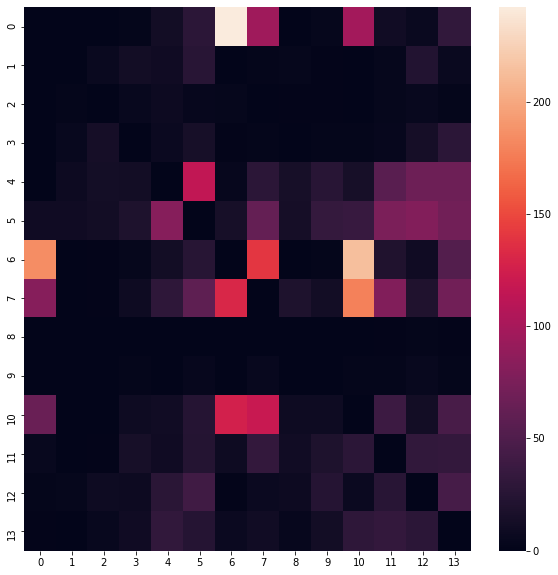

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
res = mod.predict(X_test)
y_pred = np.argmax(res, 1)
cm = confusion_matrix(y_pred, y_test)
np.fill_diagonal(cm, 0)
plt.figure(figsize=(10,10))
sns.heatmap(cm)

### Testing a secondary classification w/ same params as origional 
testing on subset that had high error rate.
using same regressor params

Conclusion: 

    error rate close to .5 (random guess)
    to much overlap to determine with higher accuracy
    
    Generally favors 0 over 6, check heat map with out setting diag to 0

In [207]:
sixZeroSubset = X_train.join(pd.Series(y_train, name="labels")).reset_index(drop=True)
sixZeroSubset = sixZeroSubset[(sixZeroSubset["labels"] == 10) | (sixZeroSubset["labels"] == 6)]

sixZeroSubset_test = X_test.join(pd.Series(y_test, name="labels")).reset_index(drop=True)
sixZeroSubset_test = sixZeroSubset_test[(sixZeroSubset_test["labels"] == 10) | (sixZeroSubset_test["labels"] == 6)]

sixZeroSubset["labels"] = sixZeroSubset["labels"].replace(6, 1).replace(10, 0)
sixZeroSubset_test["labels"] = sixZeroSubset_test["labels"].replace(6, 1).replace(10, 0)

X_sixZero = sixZeroSubset.drop(columns=["labels"])
X_sixZero = X_sixZero[list(X_sixZero.columns)[:]].to_numpy()
y_sixZero = sixZeroSubset.labels.to_numpy()
X_sixZero_test= sixZeroSubset_test.drop(columns=["labels"])
X_sixZero_test = X_sixZero_test[list(X_sixZero_test.columns)[:]].to_numpy()
y_sixZero_test = sixZeroSubset_test.labels.to_numpy()


In [208]:
sixZeroMod = RandomForestRegressor(n_estimators=16, 
                            random_state = 0, 
                            max_features  = 75,
                            verbose = 2,
                            n_jobs=16)
sixZeroMod.fit(X_sixZero, to_categorical(y_sixZero))
cross_val_score(sixZeroMod, X_sixZero, y_sixZero, scoring="neg_mean_squared_error", cv = 10)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 16building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16building tree 8 of 16building tree 9 of 16
building tree 10 of 16building tree 11 of 16
building tree 12 of 16
building tree 13 of 16building tree 14 of 16


building tree 15 of 16building tree 16 of 16






[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.2s rem

array([-0.27286418, -0.26875153, -0.27822457, -0.26787684, -0.27485447,
       -0.28364737, -0.26598499, -0.27228094, -0.26232384, -0.26938572])

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  12 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


0.47592067988668557


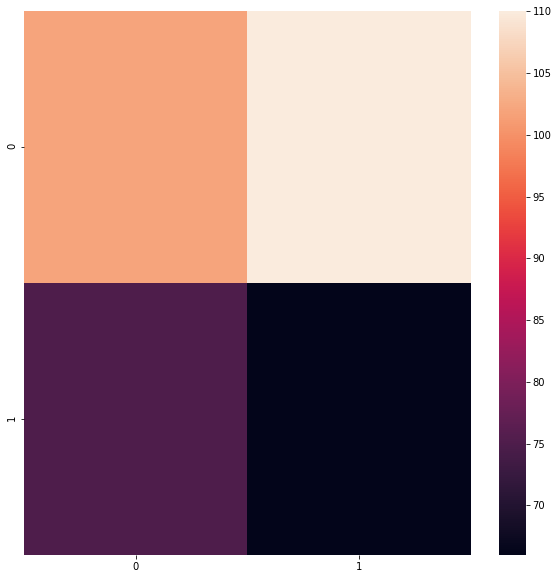

In [209]:
sixZeroPred = sixZeroMod.predict(X_sixZero_test)
sixZeroPred = np.argmax(sixZeroPred, 1)

cm = confusion_matrix(sixZeroPred, y_sixZero_test)
# np.fill_diagonal(cm, 0)
plt.figure(figsize=(10,10))
sns.heatmap(cm)
c, t = 0,0
for p, a in zip(sixZeroPred, y_sixZero_test):
    if p==a: 
        c +=1 
    t += 1
print(c /t)

## Testing ML using Tensorflow
Using data selected from above test

In [210]:
from keras.models import Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import  Activation, Dropout, Reshape, RepeatVector
from keras.layers import Input, Flatten, Embedding, Concatenate, LSTM,GlobalAveragePooling1D, Dense
from keras.layers.merge import add, multiply
from keras.regularizers import l2
from keras.initializers import TruncatedNormal
from batchnorm import BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras 
import tensorflow as tf

In [228]:
model = keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(len(X_sixZero[0]),)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='mse', optimizer="nadam", metrics=['accuracy']) #loss='binary_crossentropy', 
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 128)               23168     
_________________________________________________________________
dense_93 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_94 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 66        
Total params: 33,570
Trainable params: 33,570
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.fit(X_sixZero, to_categorical(y_sixZero), epochs=10)

Epoch 1/10
5102/5102 [==============================] - 0s 79us/step - loss: 0.2521 - accuracy: 0.4861
Epoch 2/10
5102/5102 [==============================] - 0s 33us/step - loss: 0.2487 - accuracy: 0.5321
Epoch 3/10
5102/5102 [==============================] - 0s 36us/step - loss: 0.2446 - accuracy: 0.5549
Epoch 4/10
5102/5102 [==============================] - 0s 34us/step - loss: 0.2371 - accuracy: 0.5978
Epoch 5/10
5102/5102 [==============================] - 0s 35us/step - loss: 0.2236 - accuracy: 0.6411
Epoch 6/10
5102/5102 [==============================] - 0s 34us/step - loss: 0.2017 - accuracy: 0.6960
Epoch 7/10
5102/5102 [==============================] - 0s 36us/step - loss: 0.1769 - accuracy: 0.7417
Epoch 8/10
5102/5102 [==============================] - 0s 36us/step - loss: 0.1525 - accuracy: 0.7842
Epoch 9/10
5102/5102 [==============================] - 0s 35us/step - loss: 0.1321 - accuracy: 0.8199
Epoch 10/10
5102/5102 [==============================] - 0s 33us/step - l

In [230]:
test_loss, test_acc = model.evaluate(X_sixZero_test, to_categorical(y_sixZero_test), verbose=2)
test_acc

0.5127478837966919

0.5637393767705382


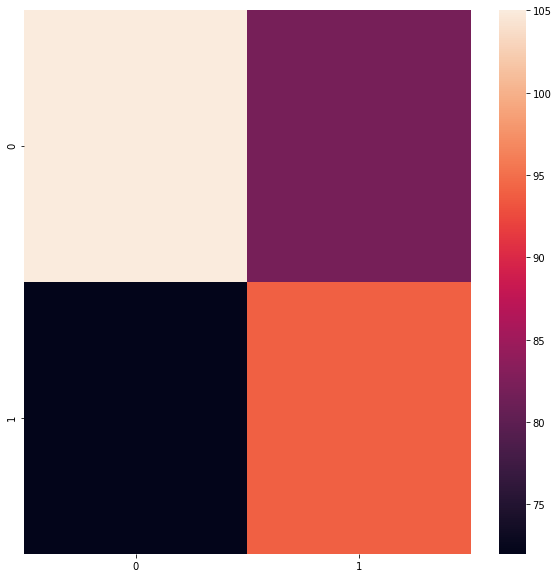

In [214]:
pred = model.predict(X_sixZero_test)
pred = np.argmax(pred, 1)
c, t = 0,0
for p, a in zip(pred, y_sixZero_test):
    if p==a: 
        c +=1 
    t += 1
print(c /t)


cm = confusion_matrix(pred, y_sixZero_test)
# np.fill_diagonal(cm, 0)
plt.figure(figsize=(10,10))
sns.heatmap(cm)

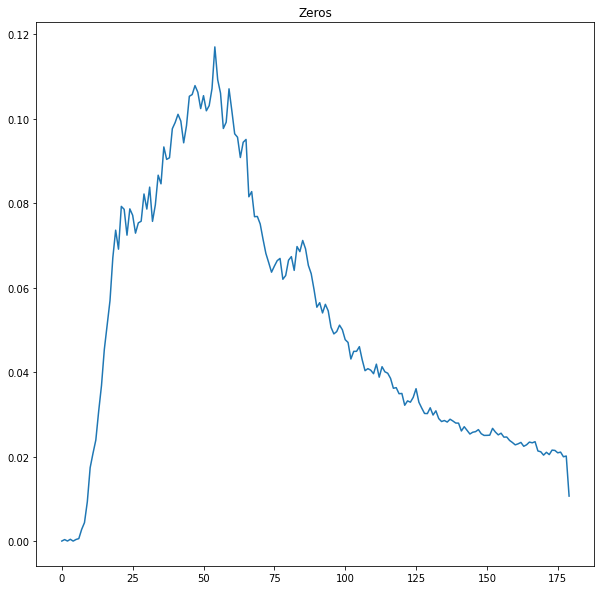

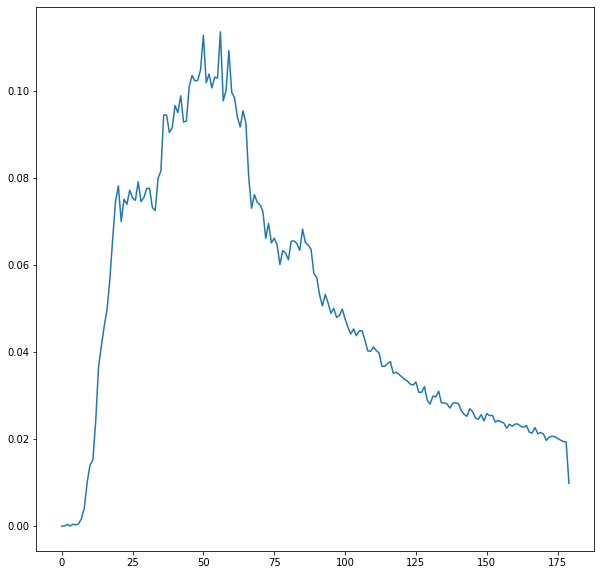

In [206]:

zeros = sixZeroSubset[sixZeroSubset.labels ==  0].drop(columns=["labels"])
plt.figure(figsize=(10,10))
plt.title("Zeros")
# for i in zeros.index:
#     vals = zeros.loc[i, :].values
vals = zeros.mean().values
plt.plot(range(len(vals)), vals)

sixs = sixZeroSubset[sixZeroSubset.labels ==  1].drop(columns=["labels"])
plt.figure(figsize=(10,10))
vals = sixs.mean().values
# plt.title("Sixs")
# for i in sixs.index:
#     vals = sixs.loc[i, :].values
plt.plot(range(len(vals)), vals)

In [ ]:
test = zeros.mean().values
test